# Aula 14 - NLP: Word Embeddings

Na aula de hoje daremos sequência ao aprendizado das técnicas de NLP. Veremos o Word Embedding:

### - Primeira parte

- Projeto: divisão dos datasets

### - Segunda parte

- Revisão rápida

### - Terceira parte

- Word Embeddings

### - Quarta parte

- Exemplos de Embeddings

### Quinta parte

- Mão na massa no projeto

# Revisão

## Dados não estruturados: textos

Já aprendemos sobre diversos tipos de dados não estruturados: imagens, textos, vídeos, páginas da internet, etc. Ficou claro a estratégia básica que rege a modelagem desse tipo de dado: a criação de features ou, mais formalmente, a definição de um espaço de representação para o problema. Não é diferente com textos: estudaremos alguns métodos bastante úteis para representar textos como vetores e, então, usar os nossos modelos tradicionais para realizar tarefas inerentes do processamento de linguagem natural: **análise de sentimento (classificar um texto)**, **tradução automática**, **geração automática de texto**, entre outras.  

![image-3.png](https://i.ibb.co/nCwzjBF/0-B6-DA4-A3-45-C9-469-E-A592-18511-B1462-D4-4-5005-c.jpg)


### - Tratamento

Existem infinitas possibilidades de tratamento do texto. Cada problema exigirá uma abordagem diferentes, mas algumas técnicas mais frequentes são:

- **Normalização**: deixar todo o texto em letras maiúsculas ou minúsculas;
- **STEM**: padronizar palavras com mesmo significado. Exemplo: _bonito_ e _bonita_ viram _bonit_;
- **Acentuação**: remoção de acentos das letras;
- **Stop Words**: remoção de palavras que agregam pouco significado. Exemplo: _de_, _que_, _como_.
    
    
### - Tokenização e Vetorização

A tokenização e vetorização são processos que ocorrem de maneira conjunta e sequencial. O processo de tokenização consiste em transformar uma string em uma sequência de tokens, como no seguinte exemplo:

![image-4.png](https://i.ibb.co/rprQ953/E5-C6-CE43-4522-4262-8515-FDB78-E01-E6-C7-4-5005-c.jpg)
    
Perceba que, para que esse processo seja executado, precisamos criar uma tabela que associa cada palavra a um id único, da seguinte maneira:

|palavra|id|
|-|-|
|um|0|
|tigre|1|
|costuma|2|
|ser|3|
|maior|4|
|que|5|
|gato|6|

Chamamos essa tabela de **vocabulário**.

A partir do texto tokenizado, podemos aplicar as técnicas de vetorização, que buscam criar a representação colunar dos nosso dados para que possamos utilizar os modelos. Estudaremos, hoje, a técnica **Word2vec** ou **Word Embeddings**.

## Word Embeddings

Um problema que surge com as representações tradicionais baseadas no Bag Of Words é a dependência completamente léxica, ou seja, as representações das palavras e, consequentemente, das sentenças, é baseada totalmente na grafia, não no significado. Um exemplo claro é a palavra "carro" ou "automóvel". Em diversos contextos, essas palavras são sinônimos. Contudo, para as representações tradicionais, "carro" é tão diferente de "automóvel" quanto é de "laranja".

Uma solução para esse problema é a criação de representações para as palavras que carregam a informação do __significado__, de alguma maneira. Uma das alternativas para se alcançar esse objetivo é utilizar a representação vetorial em espaço contínuo para as palavras, em um espaço onde palavras semelhantes estão mais próximas.


### Vetores

Para entender melhor esse tipo de estratégia, vamos recapitular o conceito geométrico de vetores.

![img](https://minireference.com/_media/math/vectors_and_point_in_cartesian_plane.jpg)

Vetores são entidades matemáticas que possuem magnitude, direção e sentido e são utilizadas nas mais diversas aplicações, principalmente na física. No nosso contexto, estamos interessados mais em sua representação. Repare que cada vetor é representado por uma sequência: no caso da figura, onde temos um plano, cada vetor é representado por uma sequência [x, y]. Como cada vetor pode ser representado por uma sequência de 2 números, dizemos que a dimensão desses vetores é 2. Perceba que, para vetores de dimensão maior do que 3, não é possível criar uma representação gráfica. 

### Vetores (embeddings) de palavras

Um cenário desejado seria, portanto, associar as palavras a vetores de maneira que palavras semelhantes sejam próximas.

![Estudo de Matheus Facure](https://matheusfacure.github.io/img/portfolio/word2vec/plot_ted21.png)

Uma das maneiras de se construir esses vetores de maneira automática (word2vec -> palavras para vetores), é a CBoW, uma técnica auto-supervisionada utilizando redes neurais lineares. Essa técnica utiliza o seguinte artifício para treinar as representações:

![teste](https://i.ibb.co/tDyTgDf/E0-CD76-B0-9-A1-F-4351-9-B89-12-A928001-DEF.jpg)


Construída a tabela de contextos, uma rede neural com a seguinte estrutura é treinada:

![img](https://i.ibb.co/fpQ5Mr1/D0-B789-BB-6-B52-41-A7-8110-7-C372808-C3-CD.jpg)


Chamamos essa etapa de construção dos vetores de **pré-treino**. Essa etapa pode ser executada sobre qualquer texto, uma vez que não depende de uma classificação prévia. Chamamos essa categoria de aprendizado auto-supervisionado. Em tese, quanto mais textos forem utilizados, melhor a representação obtida. Os vetores obtidos como resultado dessa etapa são chamados de **embeddings**. Ao final do pré-treino, os pesos das arestas que ligam as palavras à primeira camada carregam as representações vetoriais, os embeddings.

### Uso dos vetores

Como sabemos, o objetivo final das técnicas é criar uma representação para o texto para, então, utilizarmos um modelo tradicional para fazer a classificação.

Vamos supor que vetores para o nosso vocabulário foram pré-treinados em um espaço de dimensão 3. Assim, temos:

|palavra|id|vetor|
|-|-|-|
|um|0|[0.3, 0.7, -1.1]|
|tigre|1|[0.2, -0.7, -0.1]|
|costuma|2|[0.1, -1.2, 1.3]|
|ser|3|[0.9, -0.1, 0.2]|
|maior|4|[-0.7, 0.7, 0.2]|
|que|5|[0.4, 0.3, 0.8]|
|gato|6|[0.1, 0.3, 0.1]|

Para cada sentença, as palavras são substituída pelos seus repectivos vetores e, em seguida, é computada a média de cada posição, da seguinte maneira:

## <center>"um gato"

|um|gato
|-|-|
|[0.3, 0.7, -1.1]|[0.1, 0.3, 0.1]|

|um gato|
|-|
|[0.2, 0.5, -0.5]|


## <center>"ser maior"

|ser|maior
|-|-|
|[0.9, -0.1, 0.2]|[-0.7, 0.7, 0.2]|

|ser maior|
|-|
|[0.1, 0.3, 0.2]|


Por fim, temos a nossa matriz para que possamos treinar modelos de Machine Learning!


## <center>Textos originais

|texto|
|-|
|um gato|
|ser maior|


## <center>Matriz de representações

|componente 1|componente 2|componente 3|
|-|-|-|
|0.2|0.5|-0.5|
|0.1|0.3|0.2|

# Exemplo Word Embeddings

In [1]:
import pandas as pd

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

#### Carregando nosso dataset

In [4]:
from sklearn.model_selection import train_test_split

# Carregando o dataset

df_imdb = pd.read_csv('IMDB Dataset.csv')

df_imdb = df_imdb[df_imdb['sentiment'].isin(['positive', 'negative'])]

df_imdb.loc[df_imdb['sentiment'] == 'positive', 'sentiment'] = 1
df_imdb.loc[df_imdb['sentiment'] == 'negative', 'sentiment'] = 0

df_imdb['sentiment'] = df_imdb['sentiment'].astype(int)

print(df_imdb.shape)

df_imdb.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


#### Análise exploratória

In [3]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(texts):
    plt.figure(figsize=(10, 10))
    text = ' '.join(texts.tolist())
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
    words = WC.generate(text)
    plt.imshow(words, interpolation='bilinear')
    plt.show()

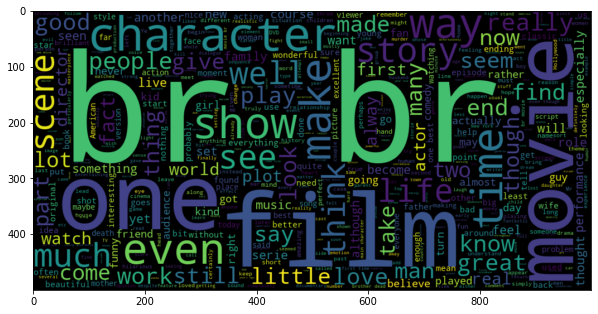

In [329]:
plot_wordcloud(df_imdb.loc[df_imdb['sentiment'] == 1, 'review'])

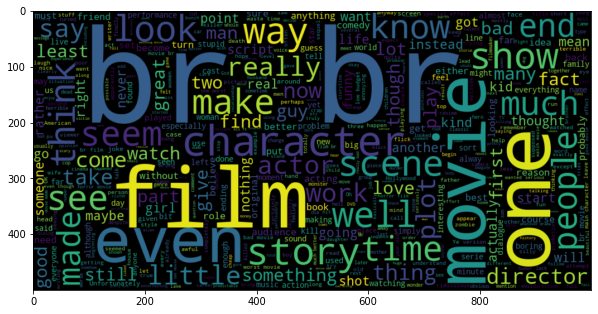

In [330]:
plot_wordcloud(df_imdb.loc[df_imdb['sentiment'] == 0, 'review'])

Vemos tags HTML aparecendo no wordcloud, o que indica a necessidade de uma limpeza extra

In [5]:
from bs4 import BeautifulSoup

def clean_html(text):
    clean_text = BeautifulSoup(text, 'lxml').text
    
    return clean_text


In [6]:
df_imdb['review'] = df_imdb['review'].apply(clean_html)

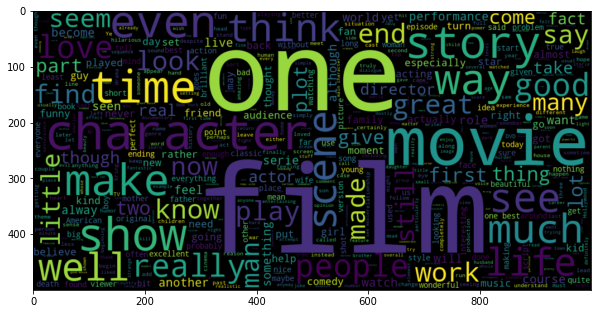

In [333]:
plot_wordcloud(df_imdb.loc[df_imdb['sentiment'] == 1, 'review'])

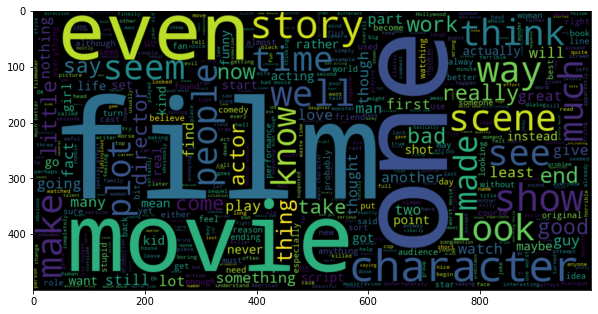

In [334]:
plot_wordcloud(df_imdb.loc[df_imdb['sentiment'] == 0, 'review'])

In [7]:
df_imdb['num_caracteres'] = df_imdb['review'].str.len()
df_imdb['num_palavras'] = df_imdb['review'].str.split().str.len()

df_imdb.head()

,review,sentiment,num_caracteres,num_palavras
0,One of the other reviewers has mentioned that ...,1,1725,301
1,A wonderful little production. The filming tec...,1,962,156
2,I thought this was a wonderful way to spend ti...,1,902,162
3,Basically there's a family where a little boy ...,0,712,132
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222


In [8]:
df_imdb[['num_caracteres', 'num_palavras']].describe(percentiles=[.1, .2, .3, .4, .5, .75, .9, .99]).T

,count,mean,std,min,10%,20%,30%,40%,50%,75%,90%,99%,max
num_caracteres,50000.0,1285.17384,971.149996,32.0,490.0,653.0,727.0,823.0,953.0,1559.0,2528.0,5096.02,13584.0
num_palavras,50000.0,227.11154,168.277429,4.0,88.0,117.0,132.0,148.0,170.0,275.0,443.0,891.01,2450.0


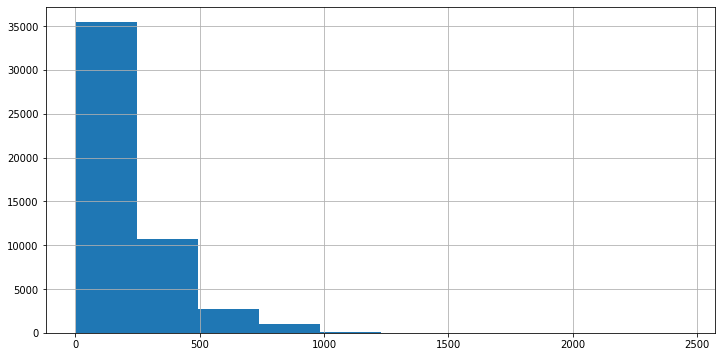

In [320]:
plt.figure(figsize=(12, 6))

df_imdb['num_palavras'].hist()

plt.show()

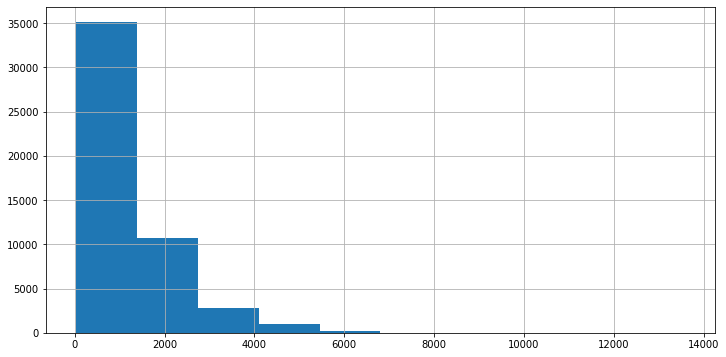

In [325]:
plt.figure(figsize=(12, 6))

df_imdb['num_caracteres'].hist()

plt.show()

In [9]:
df_train, df_valid = train_test_split(df_imdb, test_size=.2)

x_train, y_train = df_train['review'], df_train['sentiment']
x_valid, y_valid = df_valid['review'], df_valid['sentiment']

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(40000,) (40000,)
(10000,) (10000,)


# Criando os embeddings

In [15]:
from gensim.utils import simple_preprocess

# Vamos chamar essa função sempre que quisermos quebrar um texto em palavras
def tokenize(text):
    return simple_preprocess(text, min_len=1)

In [17]:
tokenize('this is a test')

['this', 'is', 'a', 'test']

In [18]:
x_train = x_train.str.lower()
x_valid = x_valid.str.lower()

In [19]:
x_train.head()

49068    i've been watching attack of the show religiou...
25858    "congo" is based on the best-selling novel by ...
42427    my wife and i couldn't even finish the film. t...
10076    i loved this mini series. tara fitzgerald did ...
4155     (some spoilers) dull as dishwater slasher flic...
Name: review, dtype: object

##### Criando os próprios vetores

In [21]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
        sentences=x_train.apply(
            lambda t: tokenize(t)
        ),
         size=50,
         window=5,
         min_count=1,
         workers=4
    )

In [25]:
len(model_w2v.wv.vocab)

92379

In [40]:
model_w2v.wv.most_similar('facebook', topn=5)

[('albéniz', 0.9019926190376282),
 ('workmen', 0.8908736109733582),
 ('pe', 0.8700293898582458),
 ('xvichia', 0.8605130910873413),
 ('festooned', 0.8597615957260132)]

In [33]:
model_w2v.wv.most_similar(positive=['best', 'bad'], negative=['good'], topn=5)

[('worst', 0.8891015648841858),
 ('funniest', 0.7554135918617249),
 ('greatest', 0.6847960948944092),
 ('finest', 0.6648914813995361),
 ('scariest', 0.6516492366790771)]

In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_words(words, model_w2v):
    vocab = [word for word in model_w2v.wv.vocab]

    X = model_w2v.wv.vectors

    pca = PCA(n_components=2)
    X_reduct = pca.fit_transform(X)

    df = pd.DataFrame(X_reduct, index=vocab, columns=['x', 'y'])

    if type(words) == int:
        df = df.sample(min(words, len(df)))
    else:
        df = df.loc[words]

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter(df['x'], df['y'])

    for word, pos in df.iterrows():
        ax.annotate(word, pos)

    plt.show()

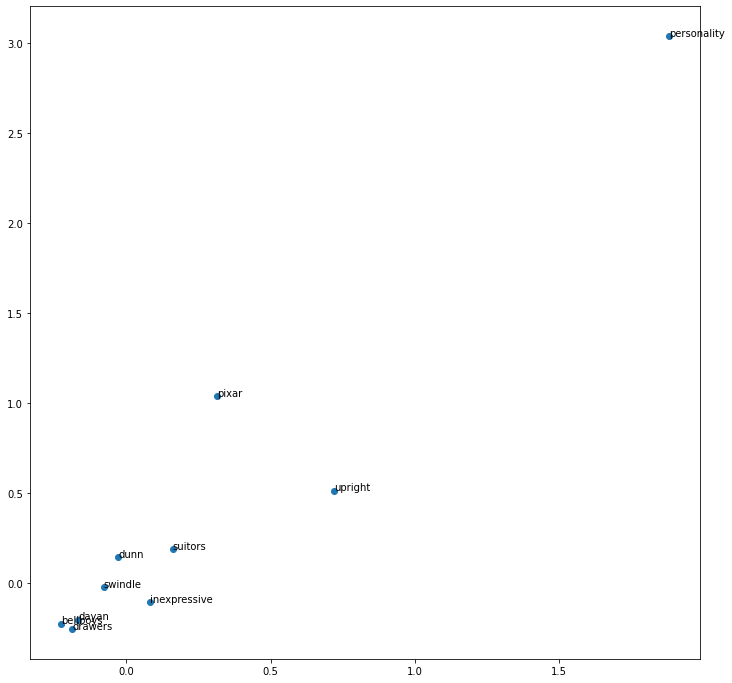

In [38]:
plot_words(10, model_w2v)

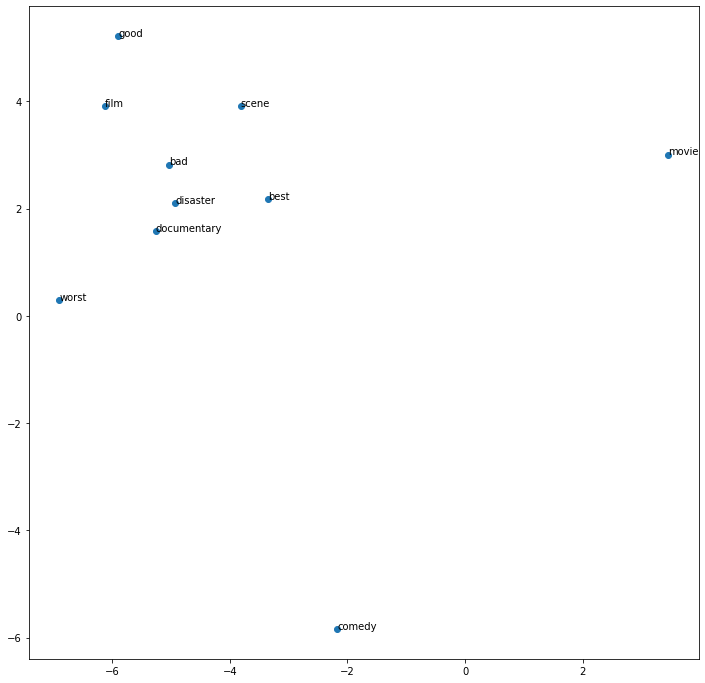

In [35]:
plot_words(['movie', 'scene', 'good', 'bad', 'disaster', 'documentary', 'comedy', 'worst', 'best', 'film'], model_w2v)

##### Usando vetores pré-treinados

In [39]:
import gensim.downloader

model_w2v_twitter = gensim.downloader.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [43]:
model_w2v_twitter.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('prince', 0.759779691696167),
 ('stone', 0.7595877051353455),
 ('queen', 0.754626989364624),
 ('meets', 0.7404001355171204),
 ('royal', 0.7376410365104675)]

In [45]:
from tqdm import tqdm

def to_word_vector(words, w2v):

    vectors = []

    for word in words:
        vectors.append(w2v.wv[word] if word in w2v.wv.vocab else np.zeros(w2v.vector_size))

    return np.mean(vectors, axis=0)

def embeddings(x, w2v):
    x = x.copy()

    x = x.apply(tokenize)

    x = np.vstack([[to_word_vector(sentences, w2v)] for sentences in tqdm(x)])

    return x

In [46]:
x_train_transformed = embeddings(x_train, model_w2v)

x_valid_transformed = embeddings(x_valid, model_w2v)

100%|██████████| 10000/10000 [00:06<00:00, 1506.56it/s]


In [47]:
x_train_transformed

(40000, 50)

In [51]:
pd.DataFrame(x_train_transformed[:10]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.352835,-1.001598,0.582102,-0.223747,0.677833,-0.687695,-0.639273,0.025961,-0.373399,-0.612392,0.444077,-0.246129,0.171674,0.641599,0.134453,0.884721,-0.390101,0.478994,-0.940899,-0.646609,0.740595,-0.715709,-0.144148,0.072431,0.159327,1.859291,0.251622,1.042722,-0.747010,1.033432,0.287057,-0.171600,-0.250639,-0.695147,-1.122028,-0.864645,-1.312893,-0.401647,0.490368,-0.525383,0.488645,-0.967913,0.183204,0.210714,-1.781965,0.294888,0.592755,0.247441,0.416720,0.671856
1,0.025192,-1.198712,0.216947,-0.116599,0.067667,-0.480772,-0.592594,0.212688,-0.247524,-0.064231,0.395078,-0.310368,0.194957,0.062920,0.073580,0.639840,-0.124328,0.280417,-0.361485,-0.425147,0.261882,-0.291546,0.063275,-0.246780,0.070120,1.403762,-0.283917,0.835097,-0.278376,0.556862,0.184456,-0.208380,-0.434482,-0.475472,-1.280614,-0.622636,-1.274920,0.188145,0.300233,-0.345066,0.414483,-0.701849,0.209513,0.430598,-1.003113,0.120670,0.468328,0.027501,0.501251,0.419232
2,0.254737,-1.240216,0.279947,-0.274047,0.440628,-0.969640,-0.399647,0.119576,-0.324567,-0.385297,0.487944,-0.269327,0.341028,0.097299,0.001683,0.690306,-0.387863,0.296322,-0.729003,-0.531436,0.479187,-0.607336,-0.127275,-0.270025,0.006155,1.446267,-0.308275,0.619124,-0.474812,0.908308,0.341125,-0.294985,-0.423078,-0.478232,-1.307808,-0.765586,-1.438664,0.068124,0.424372,-0.467011,0.582771,-1.040467,0.677871,0.234698,-1.428223,0.018301,0.245110,0.272043,0.625797,0.513851
3,0.283504,-1.167864,0.697695,0.048319,0.143906,-0.456788,-0.711888,0.088994,0.088163,-0.083750,0.596464,-0.317418,-0.220402,0.605626,-0.019438,0.794395,-0.344563,0.293204,-0.490619,-0.482463,0.055402,-0.058566,-0.320520,-0.061491,0.598958,1.410975,-0.175257,1.144482,-0.179578,0.875251,0.439793,0.141689,-0.160403,-0.471073,-1.674145,-1.093583,-1.021766,-0.182384,0.423555,-0.323856,0.661672,-0.699155,-0.043936,0.357969,-0.657044,0.096962,0.040497,-0.065218,0.767334,0.435226
4,-0.315703,-1.036099,0.803764,0.030452,0.052305,-0.554018,-0.805764,0.204278,0.016506,-0.080024,0.497058,-0.007604,0.178525,0.070633,0.517401,0.073104,0.032393,-0.117336,-0.324378,-0.393091,0.330389,-0.289103,0.179064,0.067707,0.210341,1.584057,-0.398118,0.977882,-0.203114,0.646195,0.328349,0.014609,-0.895849,-0.513870,-1.131985,-0.279051,-0.814219,0.050713,0.195964,-0.658460,0.431537,-0.858090,-0.093699,0.286528,-0.720910,0.049341,0.485812,0.032089,0.606033,0.615204


#### Selecionando o modelo

In [50]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [52]:
modelo = LGBMClassifier(n_estimators=200, max_depth=3, learning_rate=0.05, random_state=12)

modelo

LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=200,
               random_state=12)

#### Treino do modelo



In [53]:
# Treino do modelo

modelo.fit(x_train_transformed, y_train)

LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=200,
               random_state=12)

#### Resultados



In [54]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(40000,) (10000,)


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.81, Precision: 0.81, Recall: 0.82
Validação:
Acc: 0.80, Precision: 0.80, Recall: 0.81


# Implementação com Embedding do Keras

In [56]:
# Parâmetro para truncamento e padding
max_length = 300

In [59]:
def get_voc(model_w2v):
    word2id = {}
    id2word = {}

    for index, word in enumerate(model_w2v.wv.vocab):
        word2id[word] = index + 1
        id2word[index + 1] = word 

    return word2id, id2word

In [61]:
def sequence_to_id(sequence, vocabulary):
    ids = []

    for word in sequence:
        ids.append(vocabulary[word] if word in vocabulary else len(vocabulary))

    return np.array(ids)

In [62]:
vocabulary, id2word = get_voc(model_w2v)

In [64]:
id2word[4563]

'awesome'

In [63]:
vocabulary['awesome']

4563

In [67]:
x_train.head().apply(tokenize)

49068    [i, ve, been, watching, attack, of, the, show,...
25858    [congo, is, based, on, the, best, selling, nov...
42427    [my, wife, and, i, couldn, t, even, finish, th...
10076    [i, loved, this, mini, series, tara, fitzgeral...
4155     [some, spoilers, dull, as, dishwater, slasher,...
Name: review, dtype: object

In [65]:
x_train_sequences = x_train.apply(tokenize).apply(lambda s: sequence_to_id(s, vocabulary))

x_valid_sequences = x_valid.apply(tokenize).apply(lambda s: sequence_to_id(s, vocabulary))

x_train_sequences.head()

49068    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
25858    [202, 48, 203, 60, 7, 204, 205, 206, 207, 208,...
42427    [45, 378, 23, 1, 379, 86, 356, 380, 7, 219, 38...
10076    [1, 479, 76, 480, 426, 481, 482, 165, 113, 483...
4155     [73, 514, 515, 135, 516, 517, 518, 53, 179, 76...
Name: review, dtype: object

In [68]:
from keras.preprocessing.sequence import pad_sequences

x_train_sequences = pad_sequences(x_train_sequences, padding='post', truncating='post', maxlen=max_length)

x_valid_sequences = pad_sequences(x_valid_sequences, padding='post', truncating='post', maxlen=max_length)

In [71]:
x_train_sequences.shape

(40000, 300)

In [74]:
modelo = keras.Sequential(
    [
        layers.Embedding(len(vocabulary) + 1, 50, trainable=True, input_length=max_length, mask_zero=True, name="emb"),
        layers.Lambda(lambda x: keras.backend.mean(x, axis=1)),
        layers.Dense(50, activation="relu", name="layer2"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 emb (Embedding)             (None, 300, 50)           4619000   
                                                                 
 lambda_1 (Lambda)           (None, 50)                0         
                                                                 
 layer2 (Dense)              (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,621,601
Trainable params: 4,621,601
Non-trainable params: 0
_________________________________________________________________


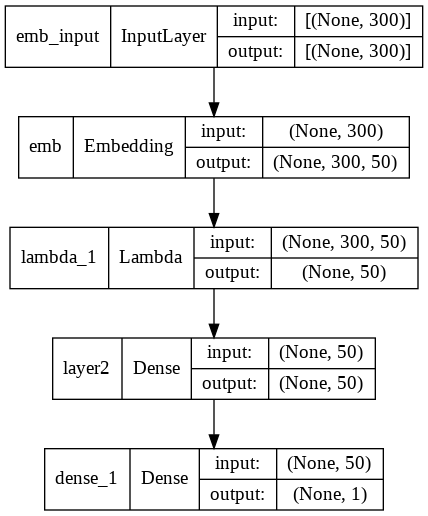

In [75]:
keras.utils.plot_model(modelo, show_shapes=True)

In [76]:
modelo.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [77]:
print("Treino do modelo")
history = modelo.fit(
    x_train_sequences,
    y_train,
    batch_size=200,
    epochs=1,
    validation_data=(x_valid_sequences, y_valid),
)

Treino do modelo
200/200 [==============================] - 14s 63ms/step - loss: 0.5783 - binary_accuracy: 0.7418 - val_loss: 0.3896 - val_binary_accuracy: 0.8487


In [78]:
y_train_pred = np.round(modelo.predict(x_train_sequences).reshape(-1))

y_valid_pred = np.round(modelo.predict(x_valid_sequences).reshape(-1))

print(y_train_pred.shape, y_valid_pred.shape)

(40000,) (10000,)


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.87, Precision: 0.85, Recall: 0.90
Validação:
Acc: 0.85, Precision: 0.83, Recall: 0.88


----------

# Pra anotar

- Para tarefas simples, o word2vec não costuma gerar grandes ganhos. Contudo, conforme aumentamos a complexidade dos problemas, seu uso passa a gerar resultados melhores;

- Essa técnica leva em consideração a semântica das palavras;

- O conceito de embedding é extremamente útil mesmo em outros contextos, como em séries temporais, processamento de imagens, análise de fraudes, etc.